In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[["salary_year_avg", "job_skills"]].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [11]:
df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values("count", ascending=False)

df_DA_skills = df_DA_skills.rename(columns={"count":"skill_count", "median":"median_salary"})

DA_job_count = len(df_DA_US)

df_DA_skills["skill_perc"] = df_DA_skills["skill_count"] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_perc"] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_perc
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


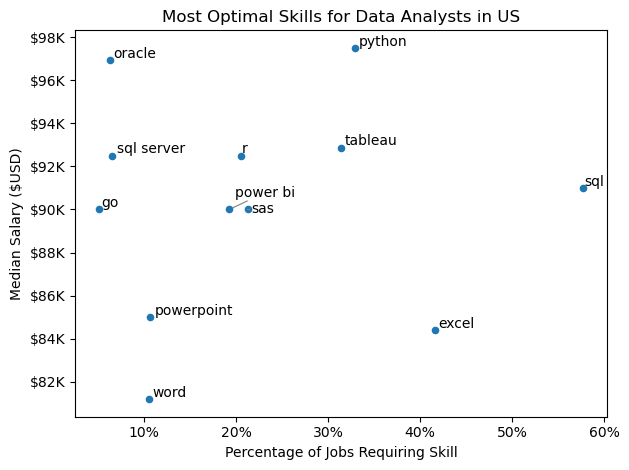

In [15]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind="scatter", x="skill_perc", y="median_salary")
plt.title("Most Optimal Skills for Data Analysts in US")
plt.xlabel("Percentage of Jobs Requiring Skill")
plt.ylabel("Median Salary ($USD)")

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_perc"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.8))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

In [17]:
df_technology = df["job_type_skills"].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
technoly_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # Convert string to dictionary
    for key, value in row_dict.items():
        if key in technoly_dict: # If key already exists, add the value
            technoly_dict[key] += value
        else:                    # If key does not exist, create it
            technoly_dict[key] = value
            
# remove duplicates by converting values to set and back to list
for key, value in technoly_dict.items():
    technoly_dict[key] = list(set(value))

technoly_dict

{'analyst_tools': ['outlook',
  'tableau',
  'msaccess',
  'esquisse',
  'splunk',
  'sas',
  'qlik',
  'spss',
  'ms access',
  'word',
  'sharepoint',
  'alteryx',
  'ssrs',
  'ssis',
  'datarobot',
  'spreadsheet',
  'sap',
  'looker',
  'cognos',
  'power bi',
  'excel',
  'powerpoint',
  'nuix',
  'powerbi',
  'visio',
  'microstrategy',
  'sheets',
  'dax'],
 'programming': ['mongodb',
  'ruby',
  'lua',
  'erlang',
  'c#',
  'matlab',
  'javascript',
  'vb.net',
  'perl',
  'julia',
  'mongo',
  'sas',
  'go',
  'delphi',
  'ocaml',
  'lisp',
  'vba',
  'dart',
  'f#',
  'golang',
  'groovy',
  'sass',
  'sql',
  'java',
  'python',
  'clojure',
  'apl',
  'typescript',
  'solidity',
  'pascal',
  'objective-c',
  'r',
  'swift',
  'bash',
  'fortran',
  'visualbasic',
  'scala',
  't-sql',
  'html',
  'elixir',
  'cobol',
  'powershell',
  'assembly',
  'shell',
  'no-sql',
  'rust',
  'kotlin',
  'c',
  'c++',
  'haskell',
  'css',
  'nosql',
  'php',
  'visual basic',
  'crys

In [40]:
df_technology = pd.DataFrame(list(technoly_dict.items()), columns=["technology", "skills"])

df_technology = df_technology.explode("skills")

# Format the technology column to be more readable
df_technology["technology"] = df_technology["technology"].str.replace("_", " ").str.title()

df_technology

,technology,skills
0,Analyst Tools,outlook
0,Analyst Tools,tableau
0,Analyst Tools,msaccess
0,Analyst Tools,esquisse
0,Analyst Tools,splunk
...,...,...
9,Sync,symphony
9,Sync,twilio
9,Sync,webex
9,Sync,microsoft teams


In [41]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

df_plot

,skill_count,median_salary,skill_perc,technology,skills
0,2508,91000.00,57.655172,Programming,sql
1,1808,84392.00,41.563218,Analyst Tools,excel
2,1431,97500.00,32.896552,Programming,python
3,1364,92875.00,31.356322,Analyst Tools,tableau
4,926,90000.00,21.287356,Analyst Tools,sas
5,926,90000.00,21.287356,Programming,sas
6,893,92500.00,20.528736,Programming,r
7,838,90000.00,19.264368,Analyst Tools,power bi
8,462,85000.00,10.620690,Analyst Tools,powerpoint
9,461,81194.75,10.597701,Analyst Tools,word


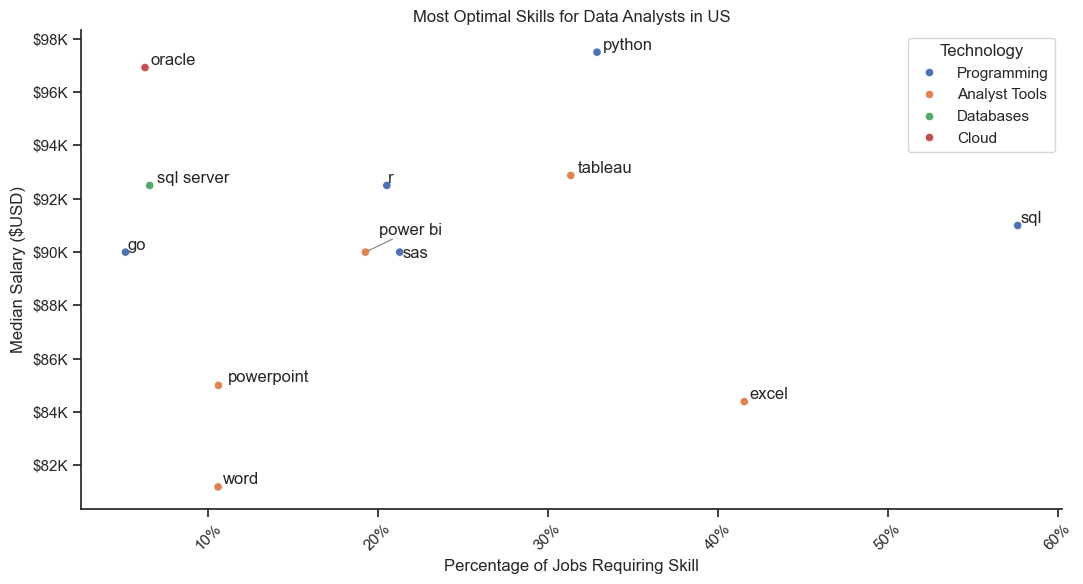

In [93]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(11, 6))

sns.scatterplot(
    data=df_plot,
    x="skill_perc",
    y="median_salary",
    hue="technology",
)
plt.title("Most Optimal Skills for Data Analysts in US")
plt.xlabel("Percentage of Jobs Requiring Skill")
plt.ylabel("Median Salary ($USD)")

sns.set_theme(style="ticks")
sns.despine()

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand["skill_perc"].iloc[i], df_DA_skills_high_demand["median_salary"].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.8))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xticks(rotation=45)

plt.legend(title="Technology")

plt.tight_layout()
plt.show()